## Looking at how fast the sudoku solver works


In [12]:
import pandas as pd
import matplotlib
import seaborn as sns
import numpy as np

df = pd.read_csv('sudoku_tst_scores.csv')


In [13]:
df_tw = (df
         .rename(columns={'Input Sudoku String': 'sudoku'})
         .assign(sudoku=lambda df_: df_.sudoku.apply(lambda x: x[1:7]),
                 Time=df.Time * 1000
            )
        )

df_tw.head()

,sudoku,Time,Difficulty,Alg2?,version
0,003020,1.32,1,True,v2.0
1,003020,1.77,1,False,v2.0
2,005306,1.38,1,True,v2.0
3,005306,1.42,1,False,v2.0
4,069800,4.71,1,True,v2.0


In [14]:
df_pl = df_tw.groupby(by=['sudoku', 'Alg2?']).mean().reset_index()
df_pl.head()


,sudoku,Alg2?,Time,Difficulty
0,000000,False,4128.309063,7906.437500
1,000000,True,4.576875,3.750000
2,000007,False,156.572917,287.041667
3,000007,True,14.605000,13.708333
4,003020,False,1.779394,1.000000


<AxesSubplot:xlabel='sudoku', ylabel='Time'>

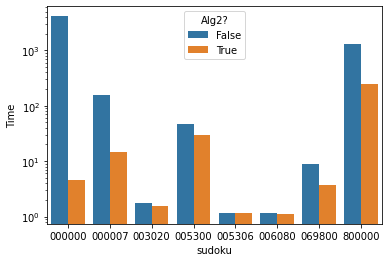

In [15]:
sns.barplot(data=df_pl, x='sudoku', y='Time', hue='Alg2?', log=True)

In [16]:
#g = sns.stripplot(data=df_tw[df_tw['Alg2?']==False], x='sudoku', y='Difficulty', hue='Alg2?')
df_tw = df_tw.rename(columns={'Alg2?': 'alg2'}).head()
#g = sns.stripplot(data=df_tw.query('alg2==False'), x='sudoku', y='Difficulty', hue='Alg2?')